# AIML 2024-2025 Project

* Vince Coppens
* Mateusz Waglowski
* Hamza Yazan Jamal

## Libraries

Install all necesary libraries

In [269]:
%pip install pandas
%pip install missingno
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import all necesary libraries

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm
import scipy.stats as stats
import datetime as dt
from scipy.stats import lognorm
from scipy.stats import beta

## Import and prepare dataset

Import the dataset as a dataframe

In [271]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


Following variables are part of the dataset:
- **Peace_Treaty_Accords**: Number of formal peace agreements made between alien species.
- **Technological_Advancements**: The level of technological innovations achieved by the planet's inhabitants.
- **Ammonia_Concentration**: The concentration of ammonia in the planet’s atmosphere or environment.
- **Precious_Metal_Trade_Tons**: The total trade volume of precious metals conducted by the planet, measured in tons.
- **Food_Production_Tons**: The amount of food produced on the planet, measured in tons.
- **Trade_Agreements_Signed**: The total number of interplanetary trade agreements signed by the planet's inhabitants.
- **Last_Contact_Days**: The number of days since the last interstellar communication or visit.
- **Discovery_Date**: The date when the planet was first discovered by alien explorers.
- **Mineral_Extraction_Tons**: The quantity of minerals extracted from the planet, measured in tons.
- **Galactic_Visits**: The number of visits made by interstellar travelers to the planet.
- **Sulfur_Concentration**: The level of sulfur present in the planet’s atmosphere or soil.
- **Exploration_Missions**: The number of exploration missions launched to study or survey the planet.
- **Biological_Research_Units**: The amount of biological research conducted on the planet, measured in units.
- **Offspring_Colonies**: The number of colonies established by the dominant species as offspring expansions.
- **Cultural_Exchange_Programs**: The number of cultural exchange initiatives with other planets or species.
- **Military_Engagements**: The number of military conflicts or engagements that have occurred on the planet.
- **Inhabitants_Disputes**: The number of disputes or conflicts among the planet’s inhabitants.
- **Resource_Mining_Operations**: The total number of resource extraction operations active on the planet.
- **Resource_Allocation_Credits**: The amount of credits allocated to managing and distributing resources.
- **Young_Colonies**: Newly established colonies or outposts of the dominant species.
- **HeavyMetals_Concentration**: The concentration of heavy metals in the planet's environment.
- **Terraforming_Initiatives**: The number of projects initiated to alter the planet’s environment to support life.
- **Planet_ID**: A unique identifier assigned to the planet.
- **Liquid_Energy_Consumption_Terawatts**: The planet’s total consumption of liquid energy resources, measured in terawatts.
- **Alien_Population_Count**: The total population of aliens inhabiting the planet.
- **CO2_Concentration**: The concentration of carbon dioxide in the planet’s atmosphere.
- **Dominant_Species_Social_Structure**: The social organization or hierarchy of the planet’s dominant species.
- **Hydrogen_Concentration**: The concentration of hydrogen in the planet’s atmosphere or environment.
- **Colonization_Year**: The year the planet was first colonized by alien species.
- **Species_Expansion_Response**: The dominant species' response or activity related to expanding their influence or territory.
- **Galactic_Trade_Revenue**: The revenue generated from intergalactic trade conducted by the planet.
- **Alien_Civilization_Level**: The level of development and sophistication of the alien civilization inhabiting the planet.
- **Interstellar_Contact_Cost**: The total cost associated with maintaining communication and relations with other planets.
- **Interplanetary_Communications**: The number of communications or signals exchanged between planets.

In [272]:
stats_summary = df.describe()
stats_summary.T

,count,mean,std,min,25%,50%,75%,max
Peace_Treaty_Accords,2005.0,0.067332,0.250658,0.00,0.00,0.00,0.00,1.00
Technological_Advancements,2028.0,0.066075,0.248474,0.00,0.00,0.00,0.00,1.00
Ammonia_Concentration,2023.0,1.478992,1.007601,0.00,1.00,1.00,2.00,5.00
Precious_Metal_Trade_Tons,2025.0,44.140741,52.559992,0.00,8.00,24.00,56.00,362.00
Food_Production_Tons,1994.0,26.177031,39.685028,0.00,1.00,8.00,33.00,199.00
Trade_Agreements_Signed,2033.0,2.310379,1.890865,0.00,1.00,2.00,3.00,15.00
Last_Contact_Days,2006.0,48.879362,29.013427,0.00,24.00,49.00,74.00,99.00
Mineral_Extraction_Tons,2032.0,164.693898,223.372040,0.00,16.00,67.00,226.50,1725.00
Galactic_Visits,2020.0,5.332178,2.432660,0.00,3.00,6.00,7.00,20.00
Sulfur_Concentration,2031.0,1.984244,1.414822,0.00,1.00,2.00,3.00,7.00


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

Summary Statistics:

* The average number of peace treaty accords signed is approximately 0.067, indicating that peace treaties are signed relatively infrequently.
* Technological advancements have an average occurrence of 0.066, since this is a binary variable this indicates that technological advancements do not much occur.
* The average ammonia concentration is around 1.48 units, with values ranging between 1 and 5.
* Precious metal trade averages 44.14 tons, but the values can vary widely, ranging from 0 to a high of 362 tons.
* Food production averages 26.18 tons, with large variations; some instances produce as little as 1 ton, while the maximum is 199 tons.
* Resource extraction is highly variable, with mineral extraction averaging 164.69 tons, ranging from 0 to as high as 1,725 tons.
* Galactic visits occur at an average rate of 5.33 visits, generally ranging from 2 to 7 visits.
* Exploration missions average 2.66 missions, with most entities conducting between 0 and 4 missions.
* Biological research units average 37.8 units, ranging from 0 to 259 units.
* On average, 0.44 offspring colonies are established per entity, ranging from 0 to a maximum of 2.
* Resource mining operations average 5.76 operations, with a range of 0 to 13 operations per entity.
* The average hydrogen concentration in the system is 59.83 units, varying from 1.03 to 119.99 units.
* Heavy metals concentration averages 2.99 units, typically between 2 and 6 units.

Check whether there are duplicate rows

In [274]:
duplicate_values = False
for i in df.duplicated():
    if i == True:
        print(i)
        duplicate_values = True
if duplicate_values == False:
    print('No duplicate rows were found.')

No duplicate rows were found.


Using Missingno to plot the NaN values.

<Figure size 600x300 with 0 Axes>

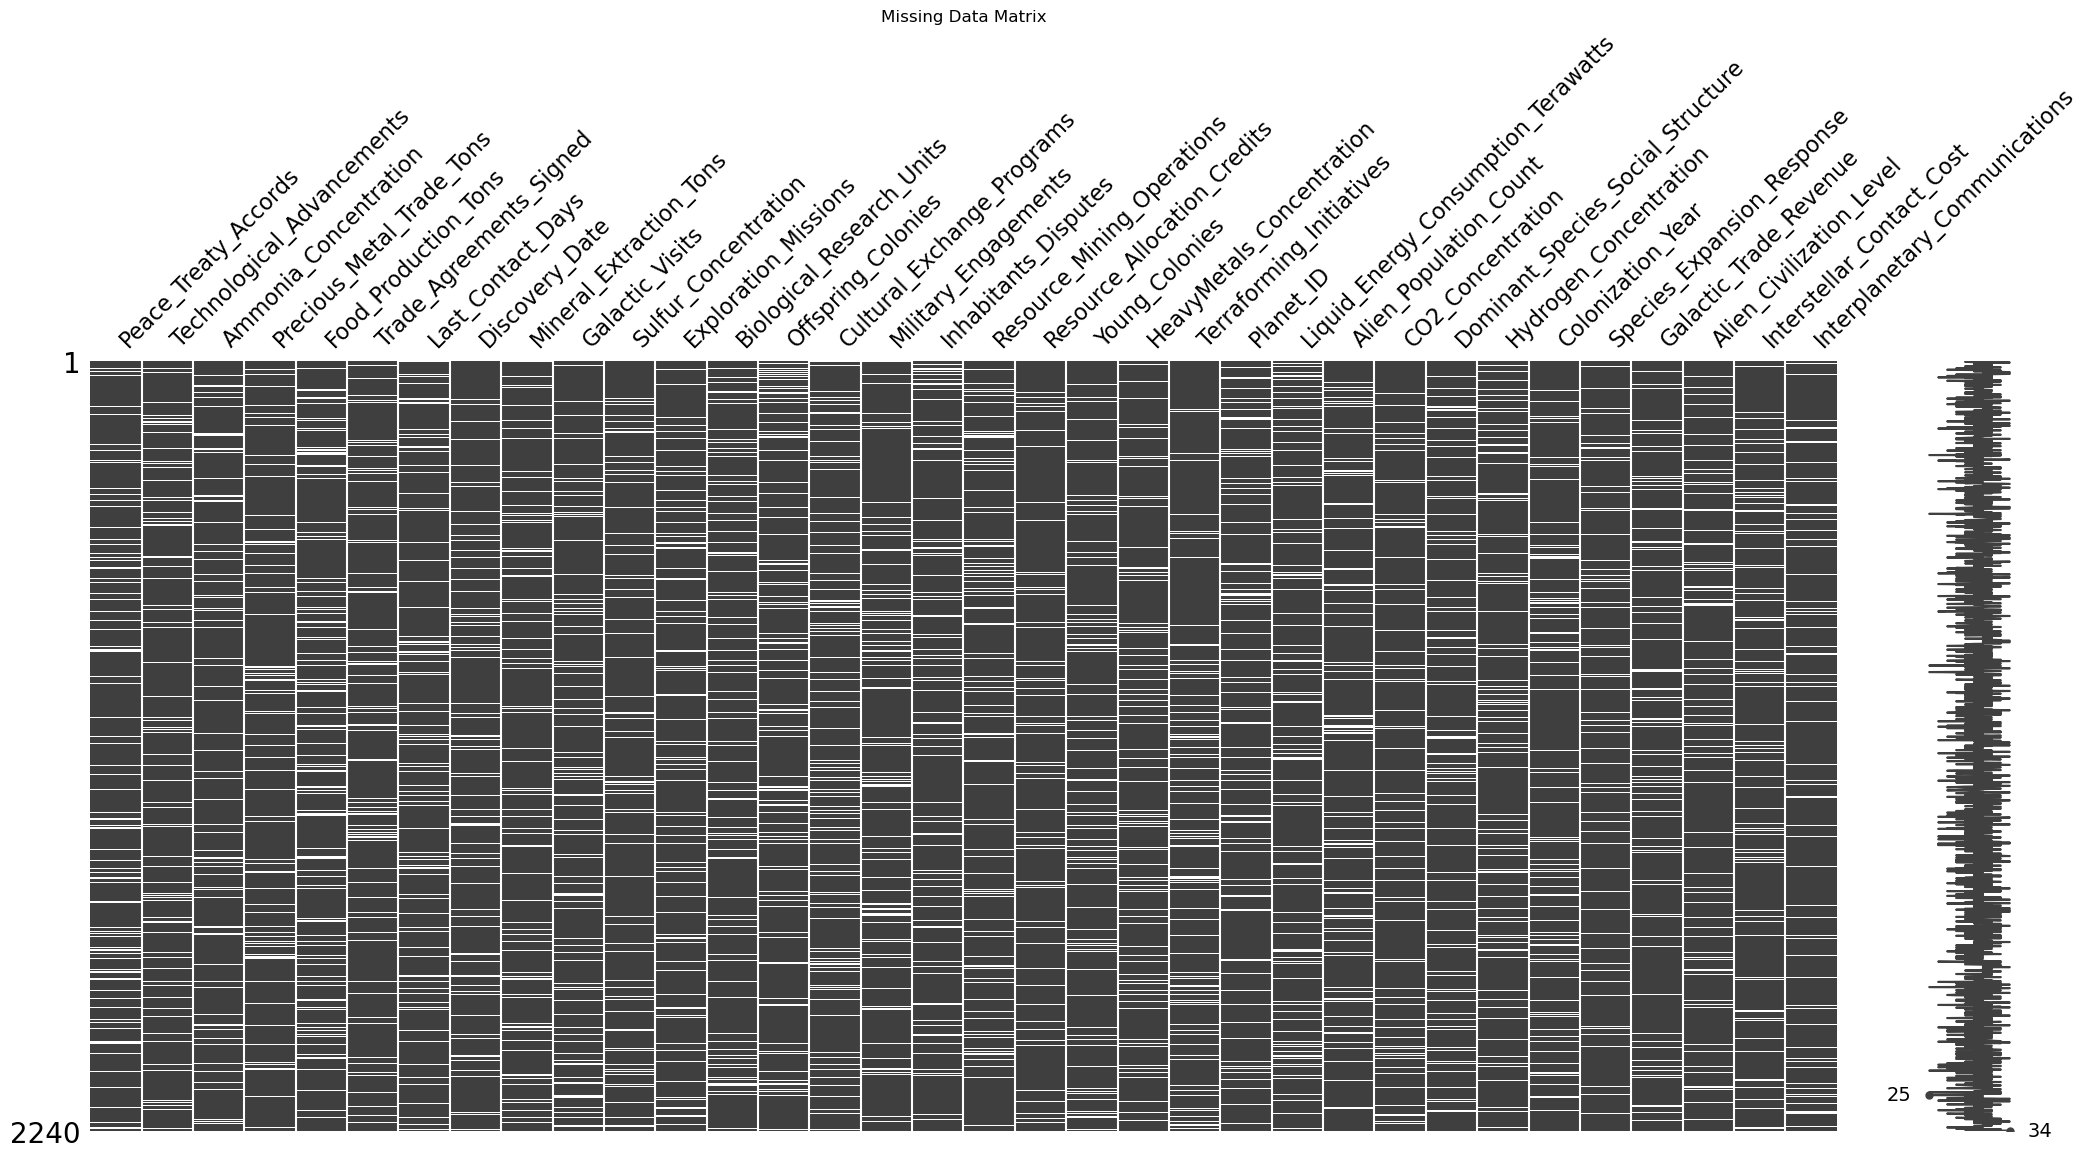

In [275]:
plt.figure(figsize=(6, 3))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Number of data rows

In [276]:
print(f'There are {df.shape[0]} rows.')

There are 2240 rows.


Number of NaN's per variable and relative percentage, the next cell shows a graphical representation.

In [277]:
nan_counts = df.isna().sum()
nan_counts_df = nan_counts.to_frame(name='NaN_Count')
nan_counts_df = nan_counts_df.reset_index()
nan_counts_df.columns = ['Variable', 'NaN_Count']
nan_counts_df['Relative'] = nan_counts_df['NaN_Count'] / df.shape[0]
nan_counts_df = nan_counts_df.sort_values(by='Relative', ascending=False)
nan_counts_df = nan_counts_df.reset_index(drop=True)
print(nan_counts_df)

                               Variable  NaN_Count  Relative
0                     Colonization_Year        260  0.116071
1                Galactic_Trade_Revenue        257  0.114732
2   Liquid_Energy_Consumption_Terawatts        248  0.110714
3                  Food_Production_Tons        246  0.109821
4                Alien_Population_Count        241  0.107589
5                    Offspring_Colonies        238  0.106250
6                  Peace_Treaty_Accords        235  0.104911
7                     Last_Contact_Days        234  0.104464
8     Dominant_Species_Social_Structure        233  0.104018
9                Hydrogen_Concentration        231  0.103125
10           Resource_Mining_Operations        231  0.103125
11             Terraforming_Initiatives        230  0.102679
12                 Inhabitants_Disputes        229  0.102232
13                       Young_Colonies        226  0.100893
14                       Discovery_Date        226  0.100893
15        Interplanetary

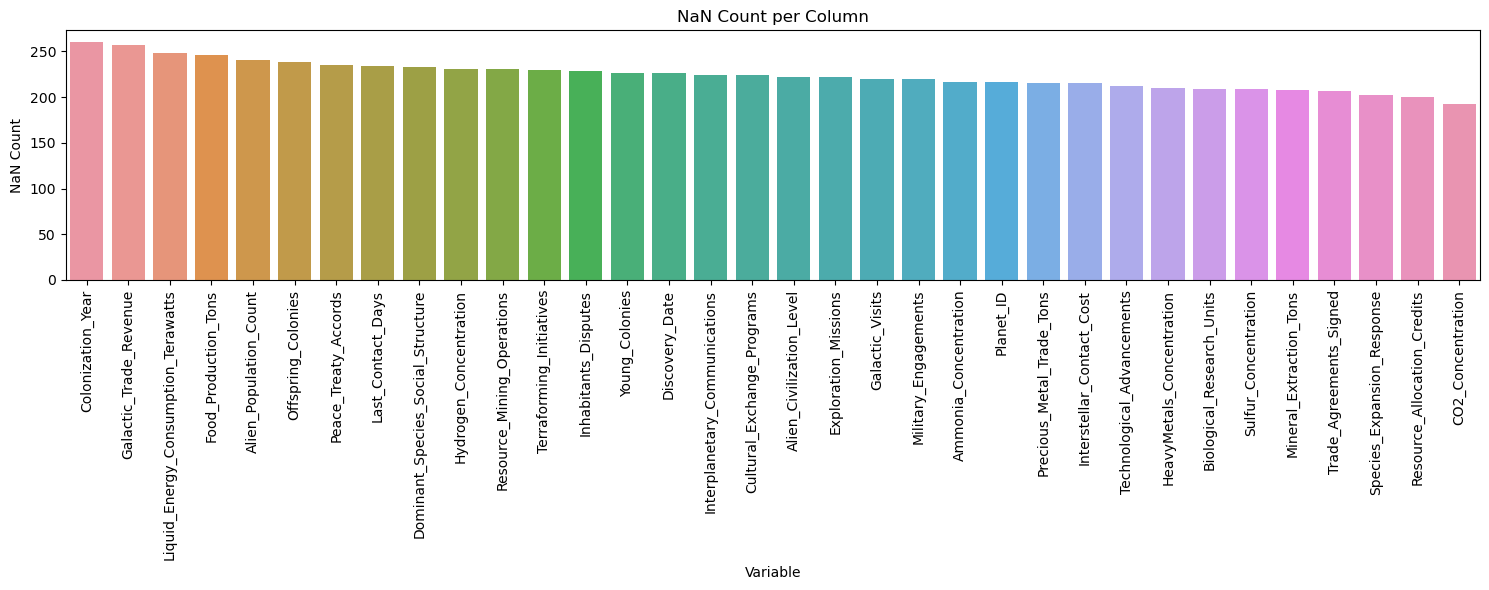

In [278]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
sns.barplot(data=nan_counts_df, x='Variable', y='NaN_Count', order=nan_counts_df['Variable'])

# Set labels and title
plt.xlabel("Variable")
plt.ylabel("NaN Count")
plt.title("NaN Count per Column")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there rows who do not miss any value?

In [279]:
complete_rows = df.dropna().shape[0]
total_rows = df.shape[0]

print(f'The percentage of rows without empty values is: {round(complete_rows/total_rows, 2)}%')

The percentage of rows without empty values is: 0.03%


*Only 0.03% of the rows is complete, so we will have to predict some NaN's to make sure we have usefull data. We will go over the variables, check their distributions, correlations and drop the columns which we don't need.*

Drop some columns, we will do this in a new dataframe, as such we still have the data when need it afterwards.
Columns we will drop:
* Planet_ID: not relevant for clustering
* Galactic_Trade_Revenue: This variable has constant value '11', so it is not relevant for the clustering.
* Interstellar_Contact_Cost: This variable has constant value '3', so it is not relevant for the clustering.

In [280]:
#Make a copy of the dataframe, as such we can always retrieve deleted data easily
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [281]:
# Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot it easily.
df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')

df_in_progress['Discovery_Date'] = df_in_progress['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_in_progress['Discovery_Date'] = (df_in_progress['Discovery_Date']-np.mean(df_in_progress['Discovery_Date'])) / np.std(df_in_progress['Discovery_Date'])

df_in_progress

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_21044/1486550972.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_in_progress['Discovery_Date'] = pd.to_datetime(df_in_progress['Discovery_Date'], errors='coerce')


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.018263,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,-0.831594,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,-0.371167,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,0.847131,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,-0.053350,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.647477,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.403003,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,-0.660461,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


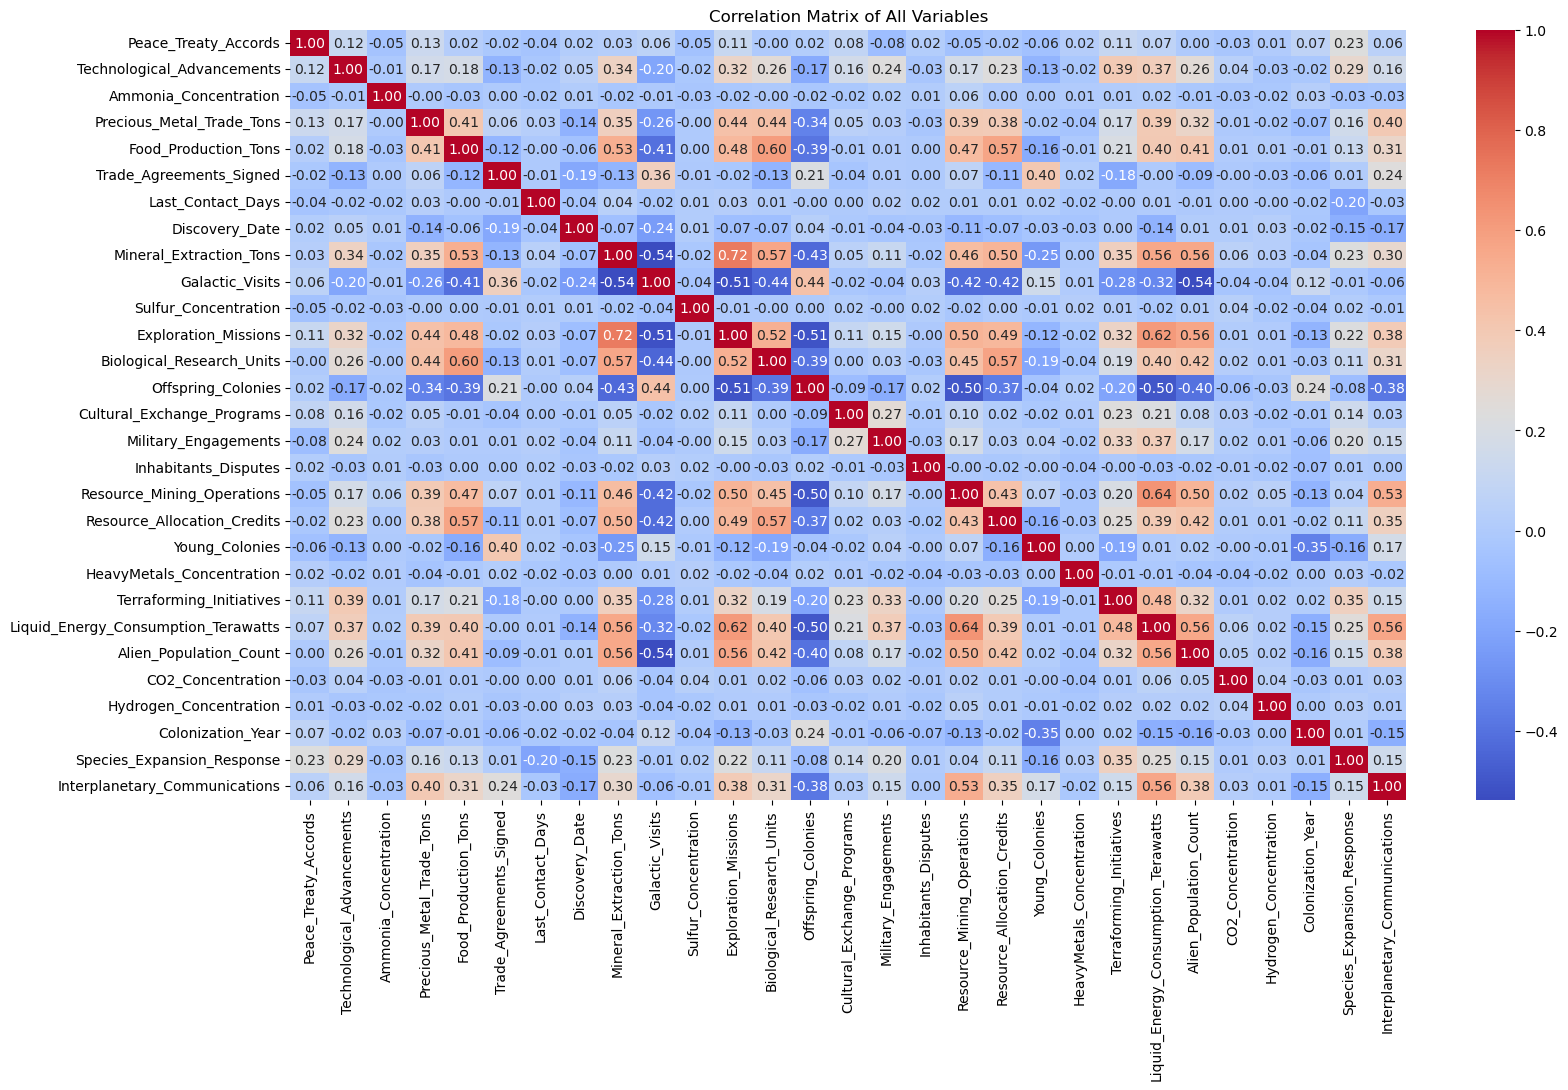

In [282]:
numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [283]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [284]:
# call the correlation caluculation function
correlation_df = high_correlations(df_in_progress)
correlation_df

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_21044/1124174870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159
3,Food_Production_Tons,Biological_Research_Units,0.599803
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399
7,Exploration_Missions,Alien_Population_Count,0.564253
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047


In [285]:
# Function to quickly plot the demanded variables

def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

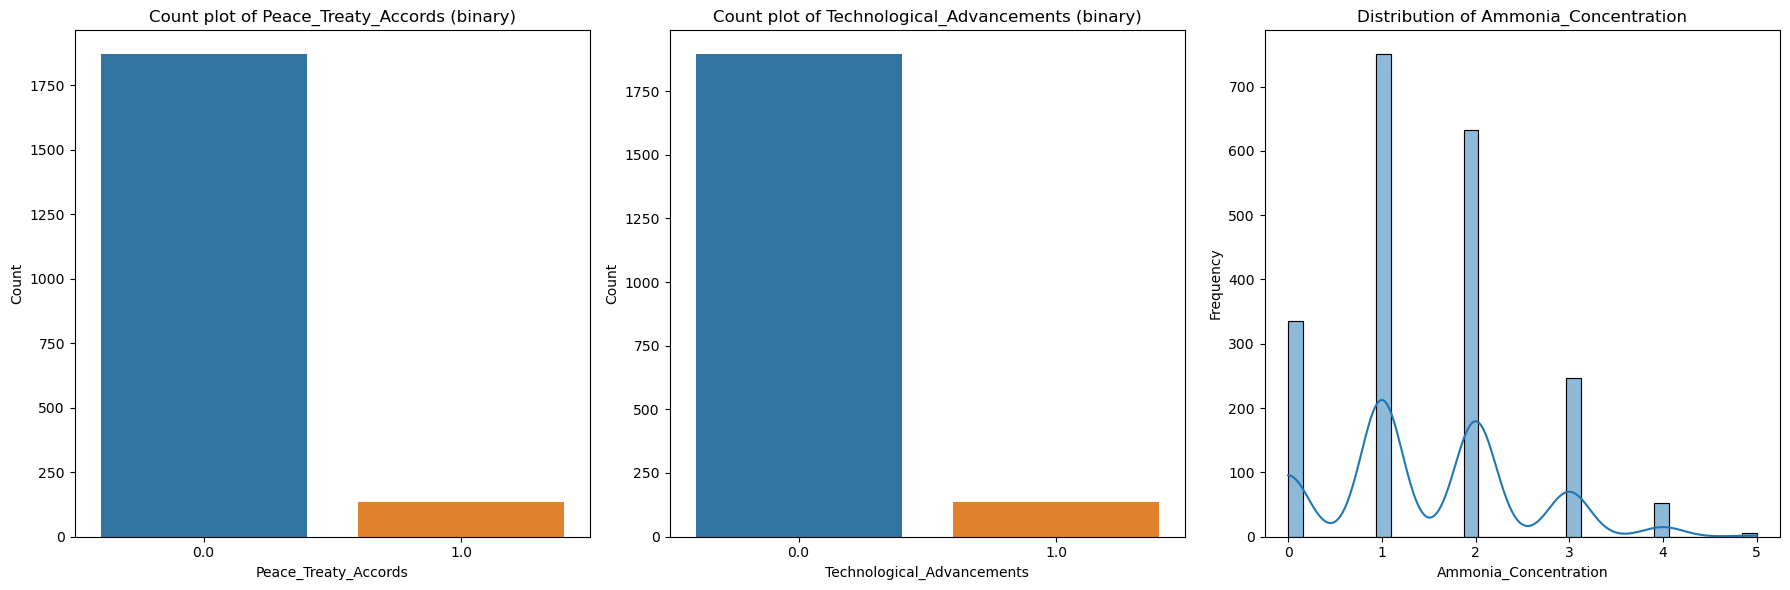

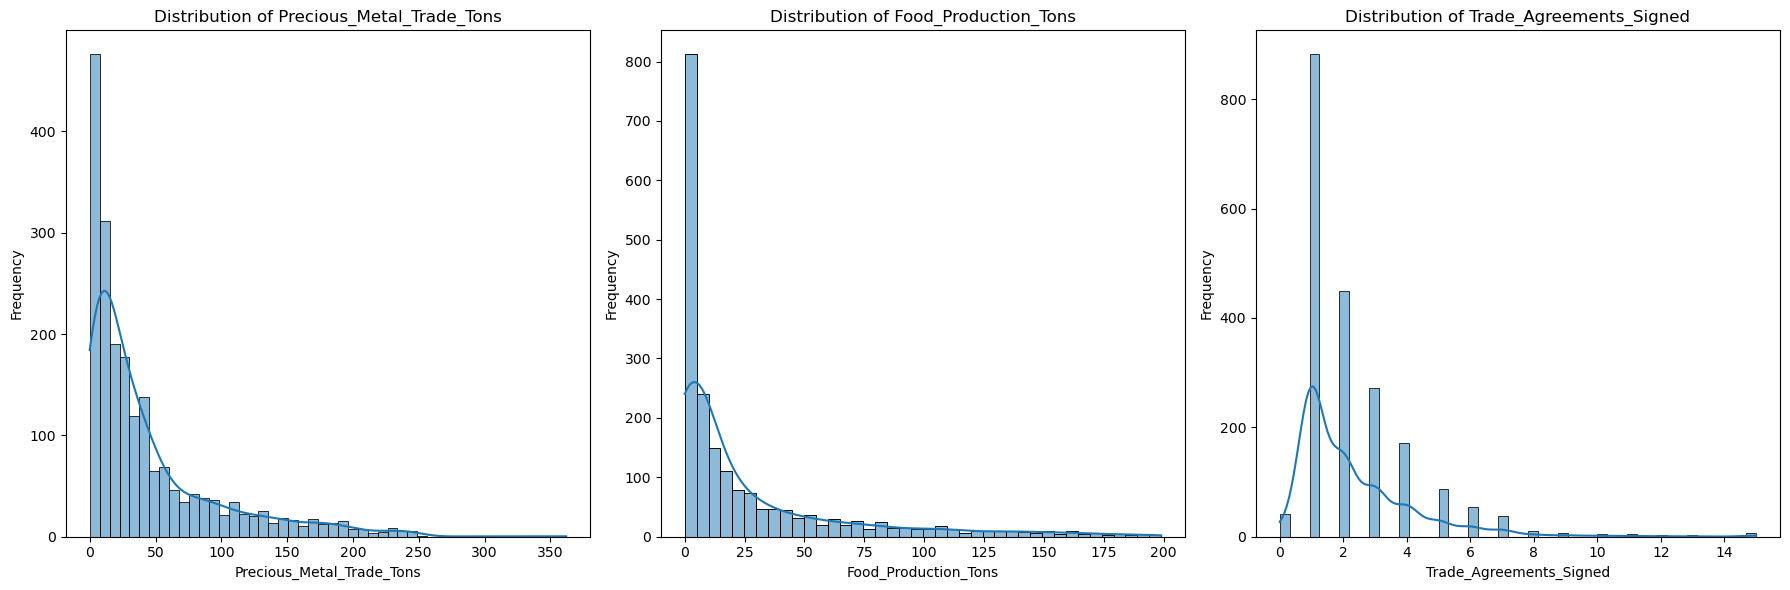

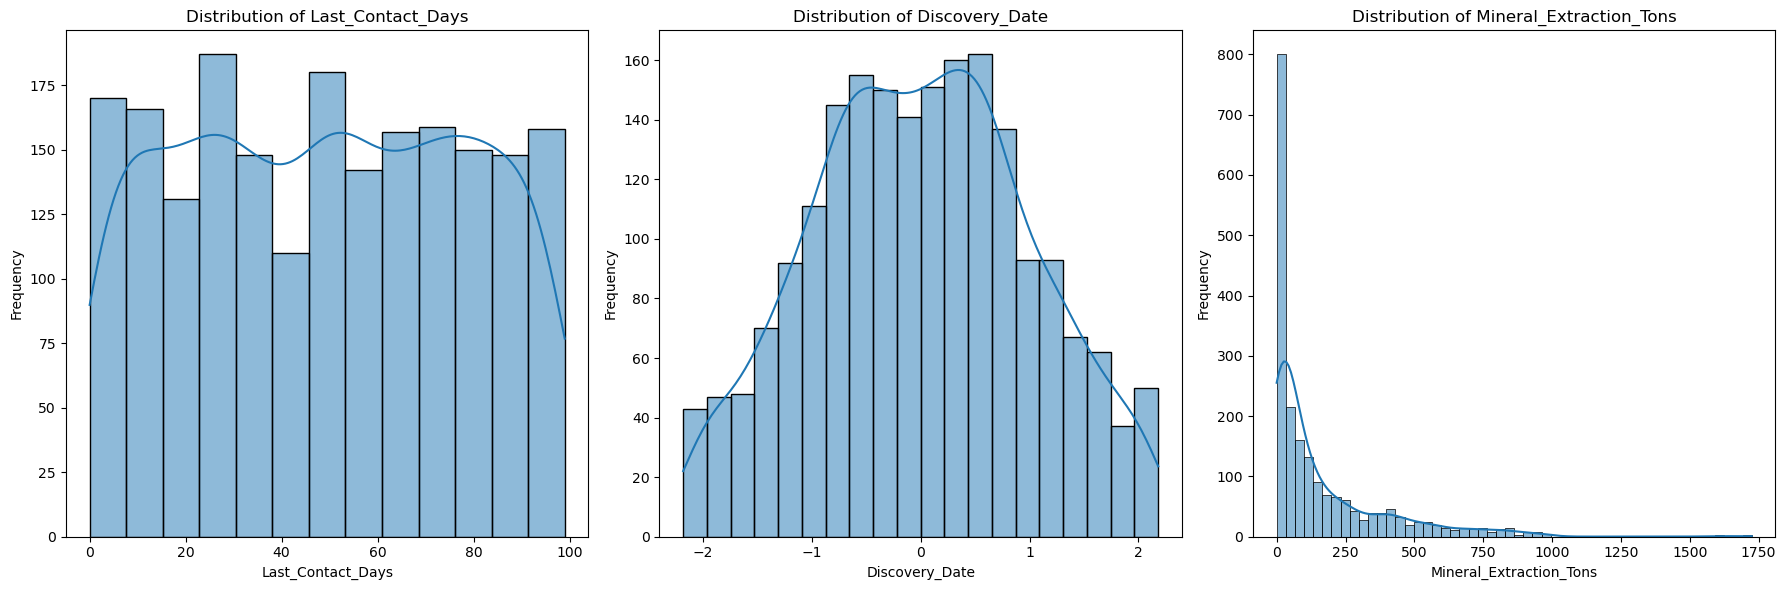

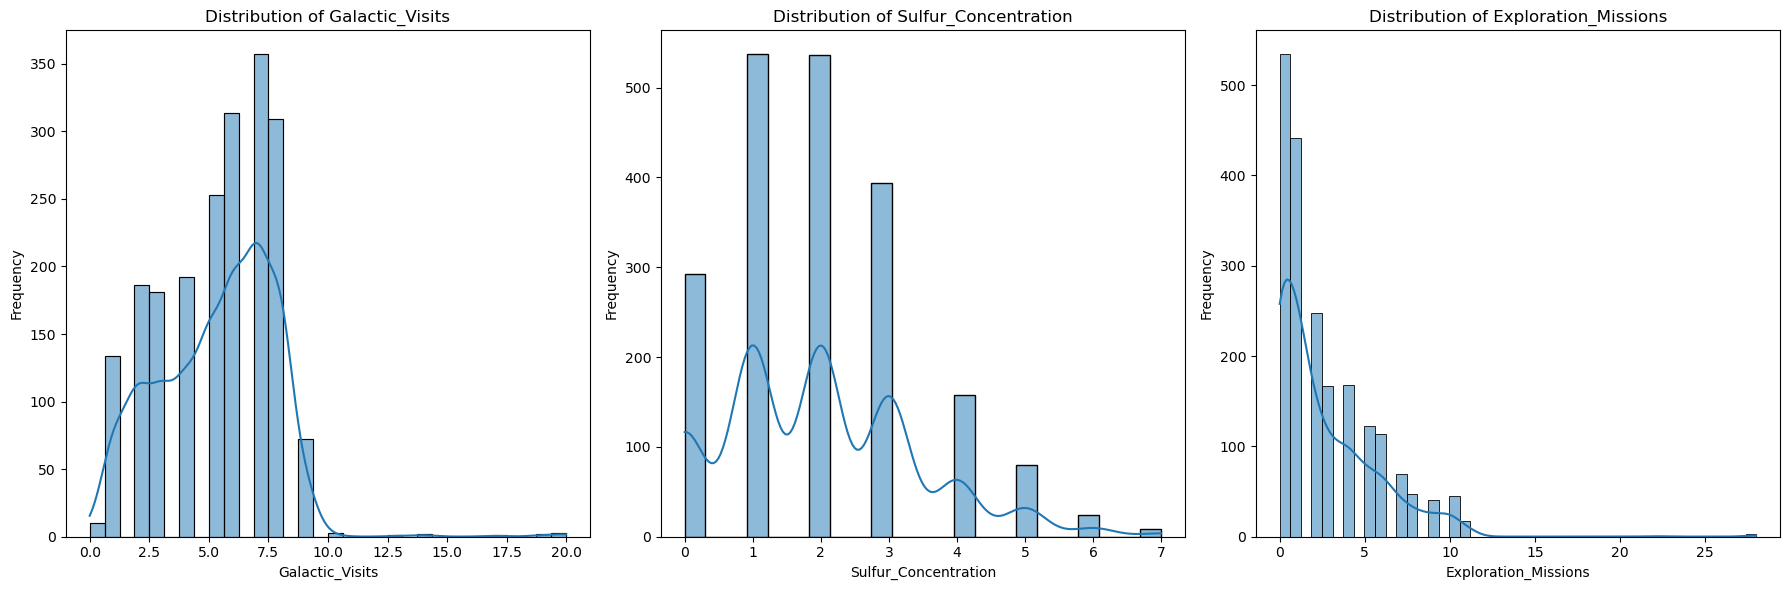

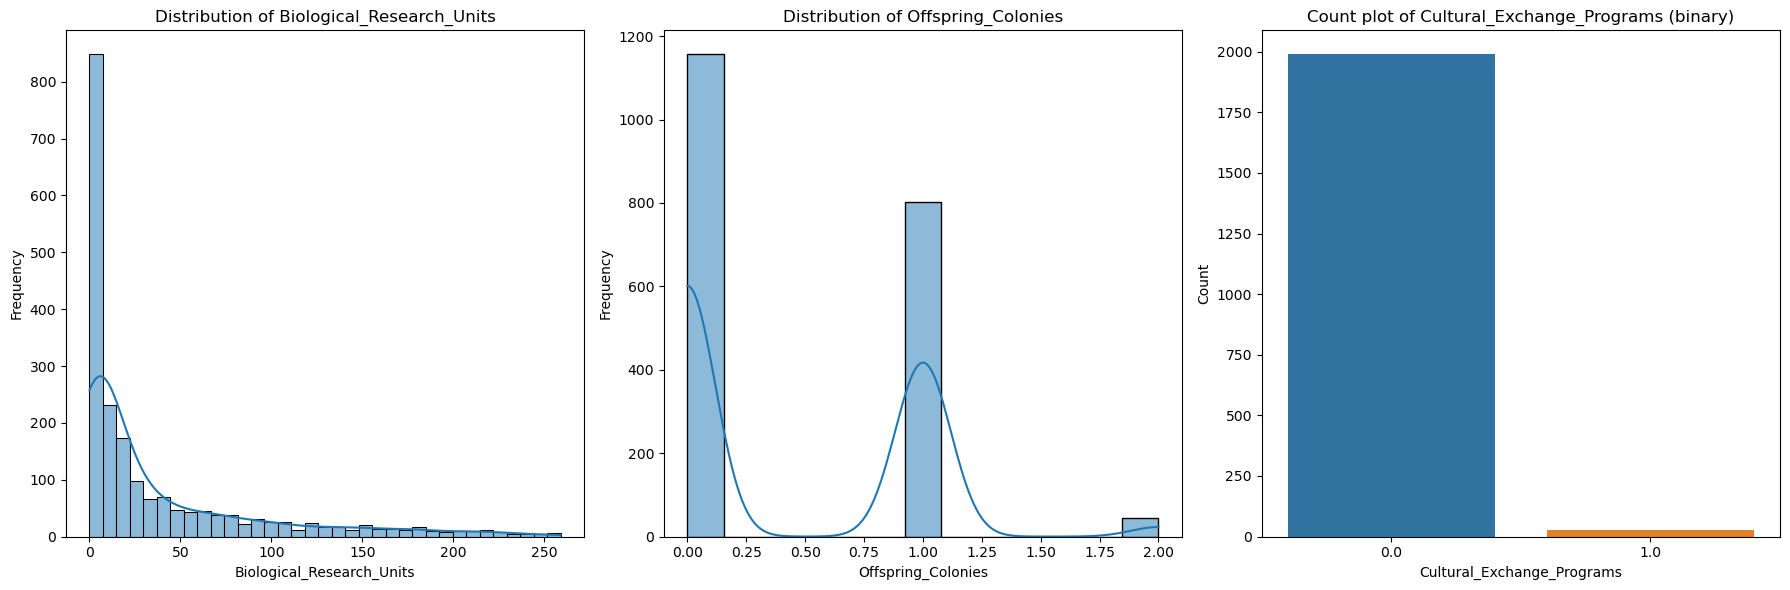

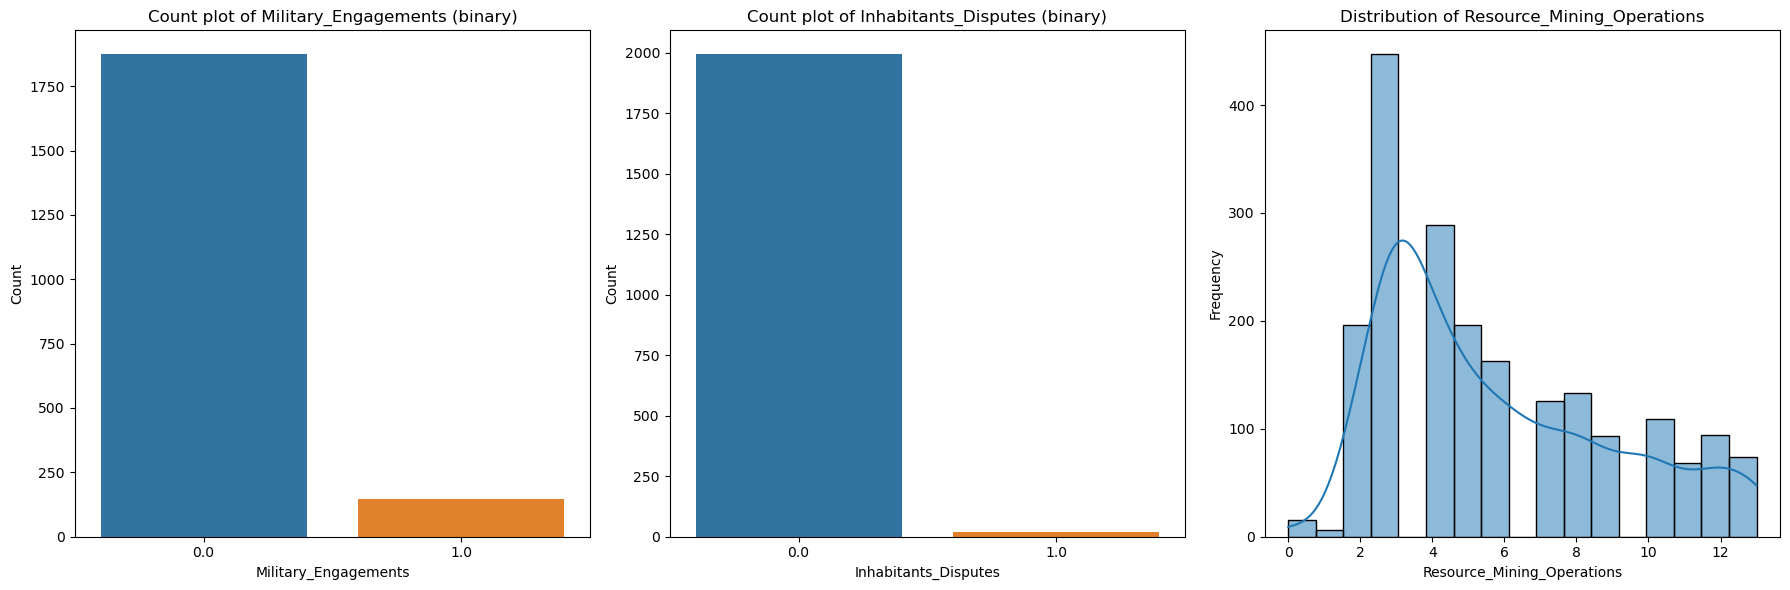

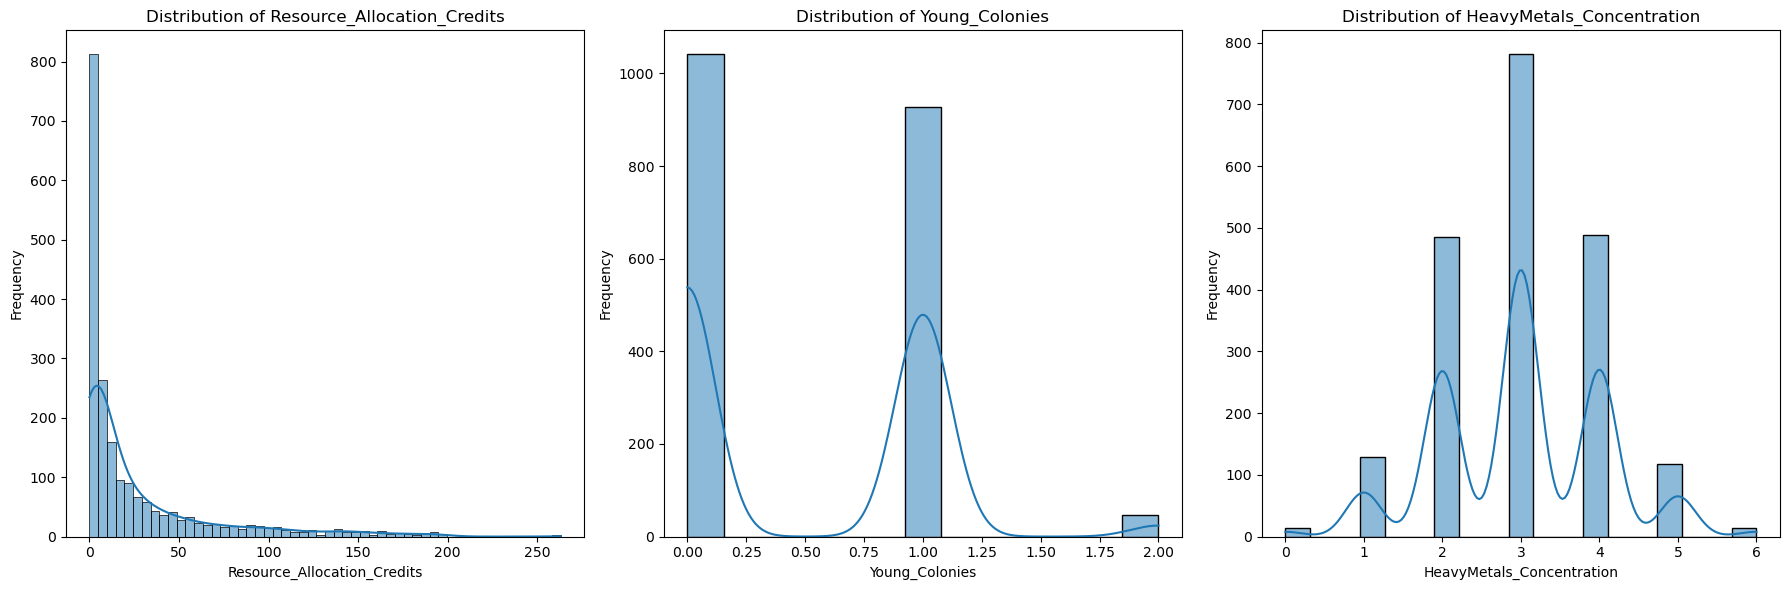

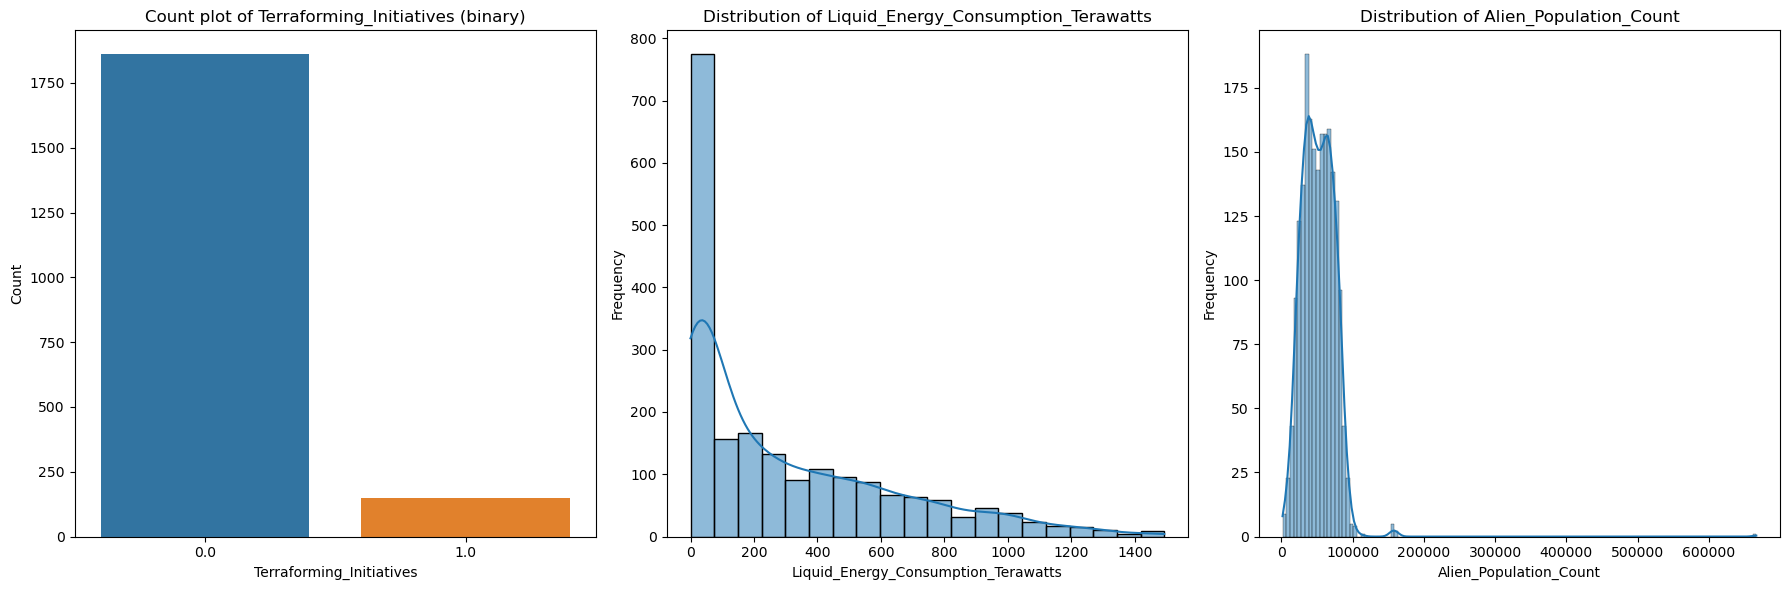

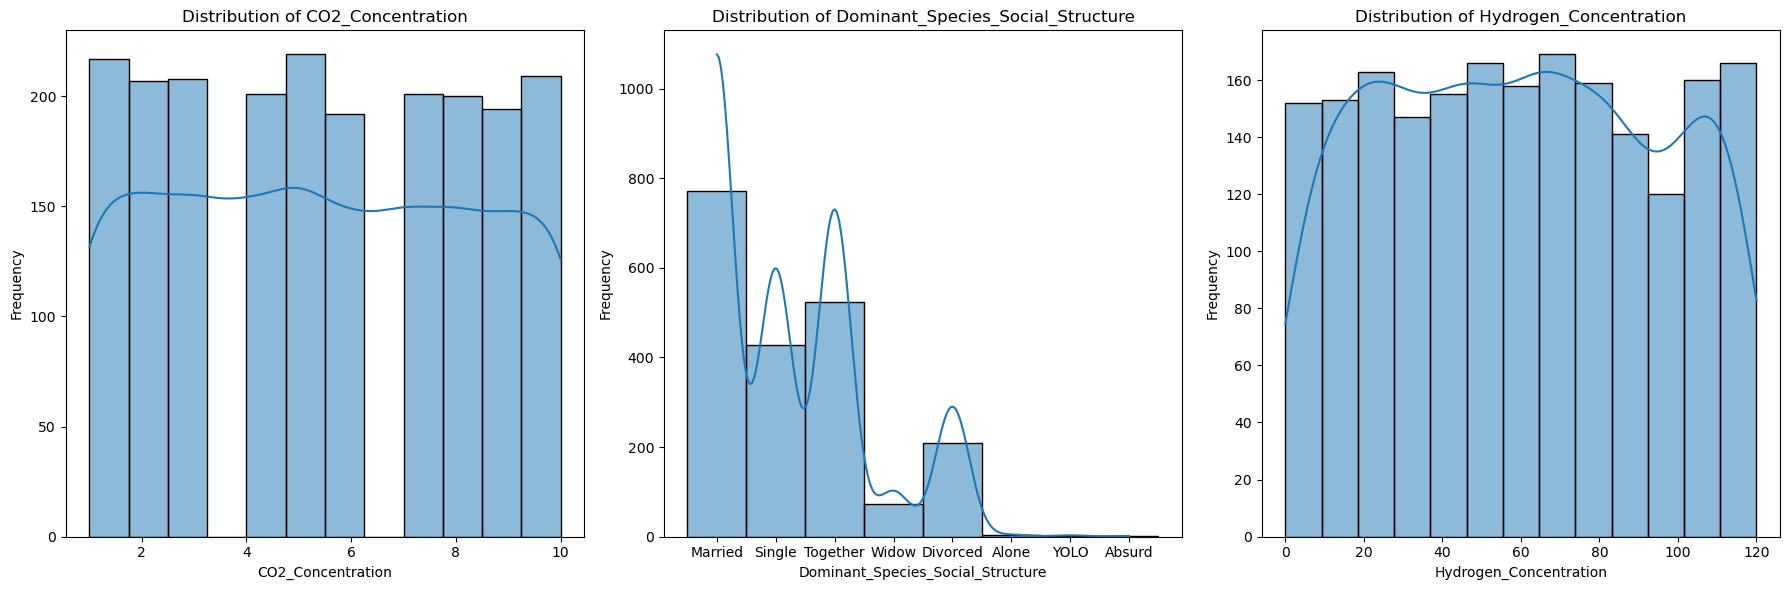

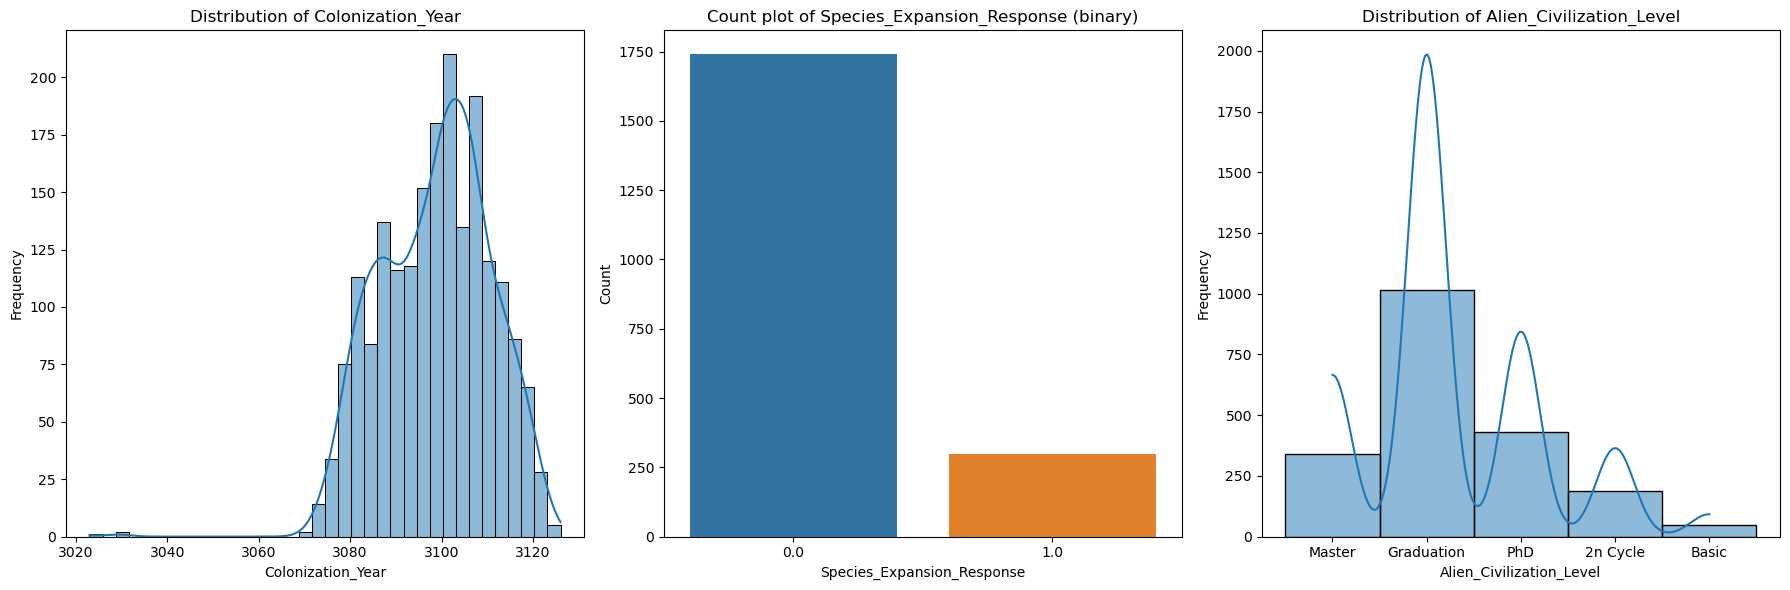

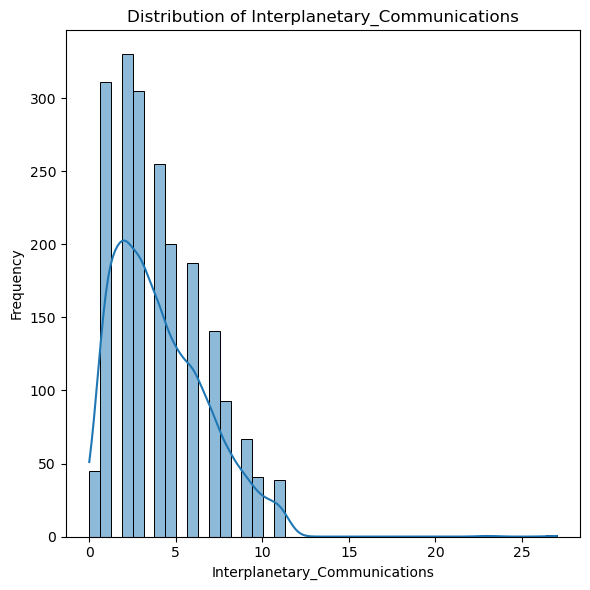

In [286]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = df_in_progress.columns
perform_graphical_analysis(plots_per_row, columns)

In [287]:
# Functions of the distributions to complete the missing values

# Bernoulli distribution
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df[column_name] = data_column

    return df

# Multinomial distribution
def impute_with_multinominal(df,column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    df.loc[nan_indices, column_name] = sampled_values

    return df

# Gamma distribution
def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Uniform distribution
def impute_with_uniform(df, column_name):
    min_val = min(df[column_name])
    max_val = max(df[column_name])
    num_missing = df[column_name].isna().sum()

    imputed_values = np.random.uniform(min_val, max_val, size=num_missing).astype(int)

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

# Normal distribution
def impute_with_normal(df, column_name):
    observed_data = df[column_name].dropna()
    loc, scale = norm.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = norm.rvs(loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Lognormal distribution
def impute_with_lognormal(df, column_name):
    # Get observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Fit a lognormal distribution to the observed data
    shape, loc, scale = lognorm.fit(observed_data, floc=0)  # Fix loc=0 for typical lognormal fits
    
    # Generate imputed values for missing data
    num_missing = df[column_name].isna().sum()
    imputed_values = lognorm.rvs(shape, loc, scale, size=num_missing)
    
    # Round imputed values to integers if needed
    imputed_values_rounded = [int(val) for val in imputed_values]

    # Assign imputed values back to the DataFrame
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Beta distribution
def impute_with_beta(df, column_name):
    # Extract observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Normalize data to the [0, 1] range for beta distribution fitting
    min_val = observed_data.min()
    max_val = observed_data.max()
    scaled_data = (observed_data - min_val) / (max_val - min_val)
    
    # Fit a beta distribution to the scaled observed data
    a, b, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)  # Constrain loc and scale to typical [0,1] for beta
    
    # Generate imputed values from the beta distribution
    num_missing = df[column_name].isna().sum()
    imputed_scaled_values = beta.rvs(a, b, loc=0, scale=1, size=num_missing)
    
    # Rescale the imputed values back to the original data range
    imputed_values = imputed_scaled_values * (max_val - min_val) + min_val
    
    # Get indices of missing values and fill them with the imputed values
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

We try to figure out which distributions match the variables. Therefore we perform a test developped by chat GPT. How to interprete the results?
1.	KS Statistic: This value represents the maximum absolute difference between the cumulative distribution function (CDF) of the data and the CDF of the theoretical distribution. A smaller KS statistic suggests a closer match between the data and the theoretical distribution.
2.	P-value: This value indicates the significance of the difference between the data and the theoretical distribution:
* A high p-value (typically above 0.05) suggests that we cannot reject the null hypothesis, meaning the data could plausibly follow the tested distribution.
* A low p-value (below 0.05) suggests a significant difference, meaning the data likely does not follow the tested distribution.

In [288]:
def retrieve_distribution(variable):
# Extract the data for the variable to analyze
    variable_distribution = df_in_progress[variable].dropna()

    # List of distributions to test
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'uniform', 'poisson', 'geom', 'binom']
    fit_results = {}

    for dist_name in dist_names:
        try:
            # Get the distribution
            dist = getattr(stats, dist_name)
            
            # Fit the distribution to the data
            if dist_name == 'binom':
                # For binomial, n is approximated as max value, p is fitted
                n = int(variable_distribution.max())
                p = variable_distribution.mean() / n
                params = (n, p)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'poisson':
                # For Poisson, we use the mean as the lambda parameter
                lambda_param = variable_distribution.mean()
                params = (lambda_param,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'geom':
                # For Geometric, the probability parameter p is approximated as 1 / mean
                p = 1 / variable_distribution.mean()
                params = (p,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            else:
                # Fit continuous distributions normally
                params = dist.fit(variable_distribution)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            
            # Store the results
            fit_results[dist_name] = {'params': params, 'ks_stat': ks_stat, 'p_value': ks_p_value}
            
        except Exception as e:
            # Handle distributions that may fail to fit
            fit_results[dist_name] = {'params': None, 'ks_stat': None, 'p_value': None, 'error': str(e)}

    # Convert results to a DataFrame and sort by p-value (higher indicates a better fit)
    fit_results_df = pd.DataFrame(fit_results).T
    fit_results_df.sort_values('p_value', ascending=False, inplace=True)

    # Display the results
    return fit_results_df

In [289]:
# We got some warnings in the output that we would like to filter out

def suppres_warnings(df):
    import warnings

    # Suppress all warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        results = list()

        for column in df.columns:
            results_df_for_column = retrieve_distribution(column)
            top_result = results_df_for_column.iloc[0].copy()
            top_result['variable'] = column
            top_result['best_distribution'] = results_df_for_column.index[0]
            results.append(top_result)

        results_df = pd.DataFrame(results).reset_index(drop=True)
        return results_df

In [290]:
# Divide the variables and perform the retrieve_distribution function on the ones of which we can not immediately recognise the distribution

numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])

all_columns = numeric_data.columns
bernoulli_columns = ['Peace_Treaty_Accords', 'Technological_Advancements']
multinomial_columns = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits']

# bernoulli_df = numeric_data[bernoulli_columns]
# multinomial_df = numeric_data[multinomial_columns]

all_columns = [col for col in all_columns if col not in bernoulli_columns]
all_columns = [col for col in all_columns if col not in multinomial_columns]

filtered_df = numeric_data[all_columns]

# Call the function which retrieves the distribution for all numeric columns
results_df = suppres_warnings(filtered_df)
results_df

,params,ks_stat,p_value,variable,best_distribution
0,"(0.6616654656103012, -1.5701225791501072e-27, ...",0.060974,5.486718e-07,Precious_Metal_Trade_Tons,gamma
1,"(0.37059386717534354, 2.1435745265017863, -5.2...",0.182046,2.661821e-58,Food_Production_Tons,beta
2,"(0.0, 99.0)",0.022992,2.358298e-01,Last_Contact_Days,uniform
3,"(0.016727736911768827, -59.79191312877824, 59....",0.023720,2.038971e-01,Discovery_Date,lognorm
4,"(1.6194690828692555, -0.07847949517516009, 58....",0.056421,4.600222e-06,Mineral_Extraction_Tons,lognorm
5,"(0.3177728522094994, -2.4725937896779726, 4.23...",0.158092,8.344764e-45,Sulfur_Concentration,lognorm
6,"(2.6620416253716552, 2.9469636646361224)",0.197265,2.757955e-69,Exploration_Missions,norm
7,"(0.36349299679333014, -2.8825664562810563e-29,...",0.169867,1.053500e-51,Biological_Research_Units,gamma
8,"(0.44455544455544455, 0.5393347246632648)",0.372528,6.948363e-250,Offspring_Colonies,norm
9,"(0.013392857142857142, 0.11494993919271189)",0.532983,0.000000e+00,Cultural_Exchange_Programs,norm


In [291]:
results_df.loc[results_df["variable"] == 'Discovery_Date', "best_distribution"] = 'norm'

In [292]:
# If we want to check the distribution for 1 specific variable, we can use this cell

# results_df = retrieve_distribution('Precious_Metal_Trade_Tons')
# results_df

In [293]:
# Bernoulli distribution

columns_to_impute = bernoulli_columns
for x in columns_to_impute:
    df_in_progress = impute_with_bernoulli(df_in_progress, x)

In [294]:
# Multinomial distribution

columns_to_impute = multinomial_columns
for x in columns_to_impute:
    df_in_progress = impute_with_multinominal(df_in_progress, x)

In [295]:
# Gamma distribution

gamma_variables = results_df[results_df["best_distribution"] == "gamma"]["variable"].tolist()
print(gamma_variables)

columns_to_impute = gamma_variables
for col in columns_to_impute:
    df_in_progress = impute_with_gamma(df_in_progress, col)

['Precious_Metal_Trade_Tons', 'Biological_Research_Units', 'Resource_Allocation_Credits']


In [296]:
# Uniform distribution

uniform_variables = results_df[results_df["best_distribution"] == "uniform"]["variable"].tolist()
print(uniform_variables)

columns_to_impute = uniform_variables
for col in columns_to_impute:
    df_in_progress = impute_with_uniform(df_in_progress, col)

['Last_Contact_Days', 'CO2_Concentration', 'Hydrogen_Concentration']


In [297]:
# Normal distribution

norm_variables = results_df[results_df["best_distribution"] == "norm"]["variable"].tolist()
print(norm_variables)

columns_to_impute = norm_variables
for col in columns_to_impute:
    df_in_progress = impute_with_normal(df_in_progress, col)

['Discovery_Date', 'Exploration_Missions', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements', 'Inhabitants_Disputes', 'Young_Colonies', 'Terraforming_Initiatives', 'Species_Expansion_Response']


In [298]:
# Normal distribution

beta_variables = results_df[results_df["best_distribution"] == "beta"]["variable"].tolist()
print(beta_variables)

columns_to_impute = beta_variables
for col in columns_to_impute:
    df_in_progress = impute_with_gamma(df_in_progress, col)

"""ERROR MADE BY MISTAKE FOR DEBUGGING"""

['Food_Production_Tons', 'HeavyMetals_Concentration', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'Colonization_Year', 'Interplanetary_Communications']


'ERROR MADE BY MISTAKE FOR DEBUGGING'

In [306]:
# Lognormal distribution

try:

    lognorm_variables = results_df[results_df["best_distribution"] == "lognorm"]["variable"].tolist()
    print(lognorm_variables)

    columns_to_impute = lognorm_variables
    for col in columns_to_impute:
        df_in_progress = impute_with_gamma(df_in_progress, col)

    # Check for remaining missing values
    df_in_progress.isna().sum()
except:
    pass

['Mineral_Extraction_Tons', 'Sulfur_Concentration', 'Resource_Mining_Operations']


In [307]:
df_in_progress.isna().sum()

Peace_Treaty_Accords                     0
Technological_Advancements               0
Ammonia_Concentration                    0
Precious_Metal_Trade_Tons                0
Food_Production_Tons                     0
Trade_Agreements_Signed                  0
Last_Contact_Days                        0
Discovery_Date                           0
Mineral_Extraction_Tons                  0
Galactic_Visits                          0
Sulfur_Concentration                     0
Exploration_Missions                     0
Biological_Research_Units                0
Offspring_Colonies                       0
Cultural_Exchange_Programs               0
Military_Engagements                     0
Inhabitants_Disputes                     0
Resource_Mining_Operations               0
Resource_Allocation_Credits              0
Young_Colonies                           0
HeavyMetals_Concentration                0
Terraforming_Initiatives                 0
Liquid_Energy_Consumption_Terawatts      0
Alien_Popul

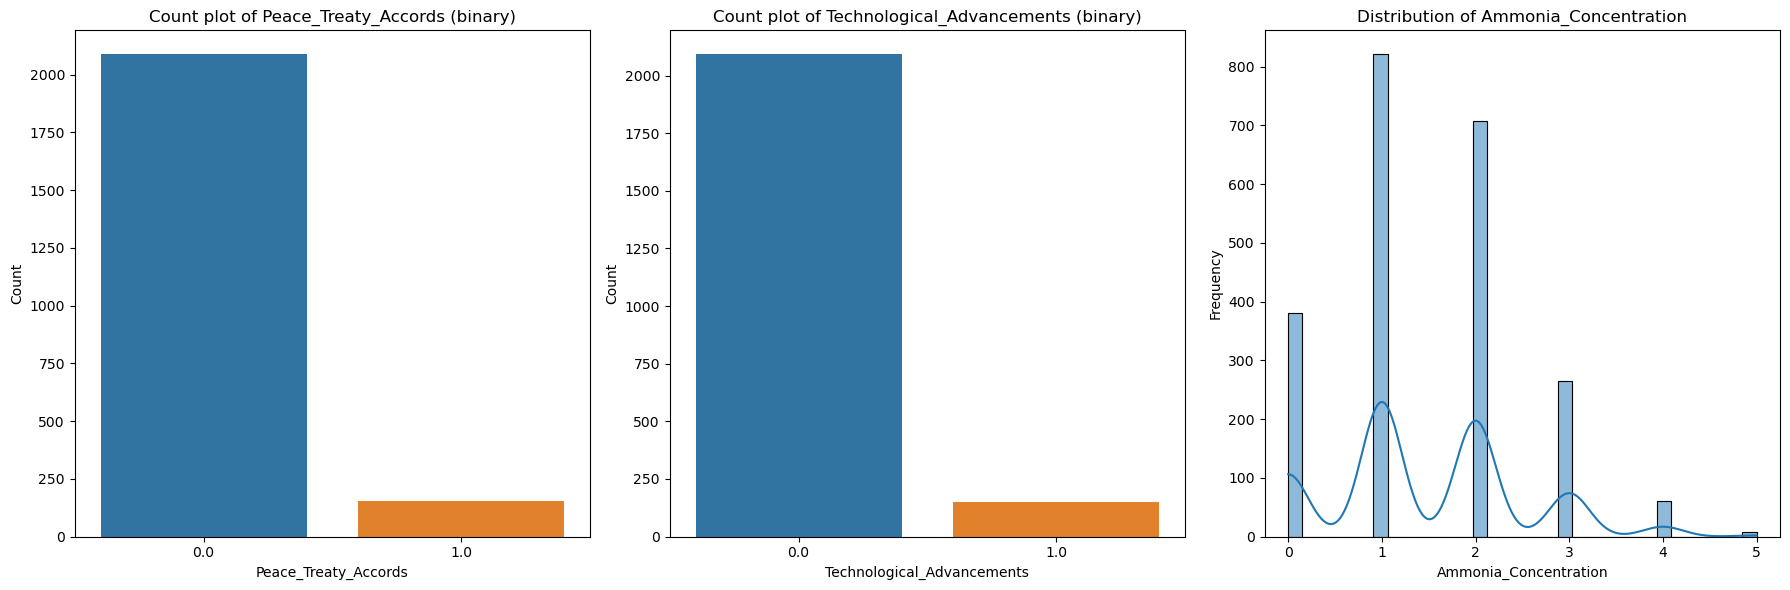

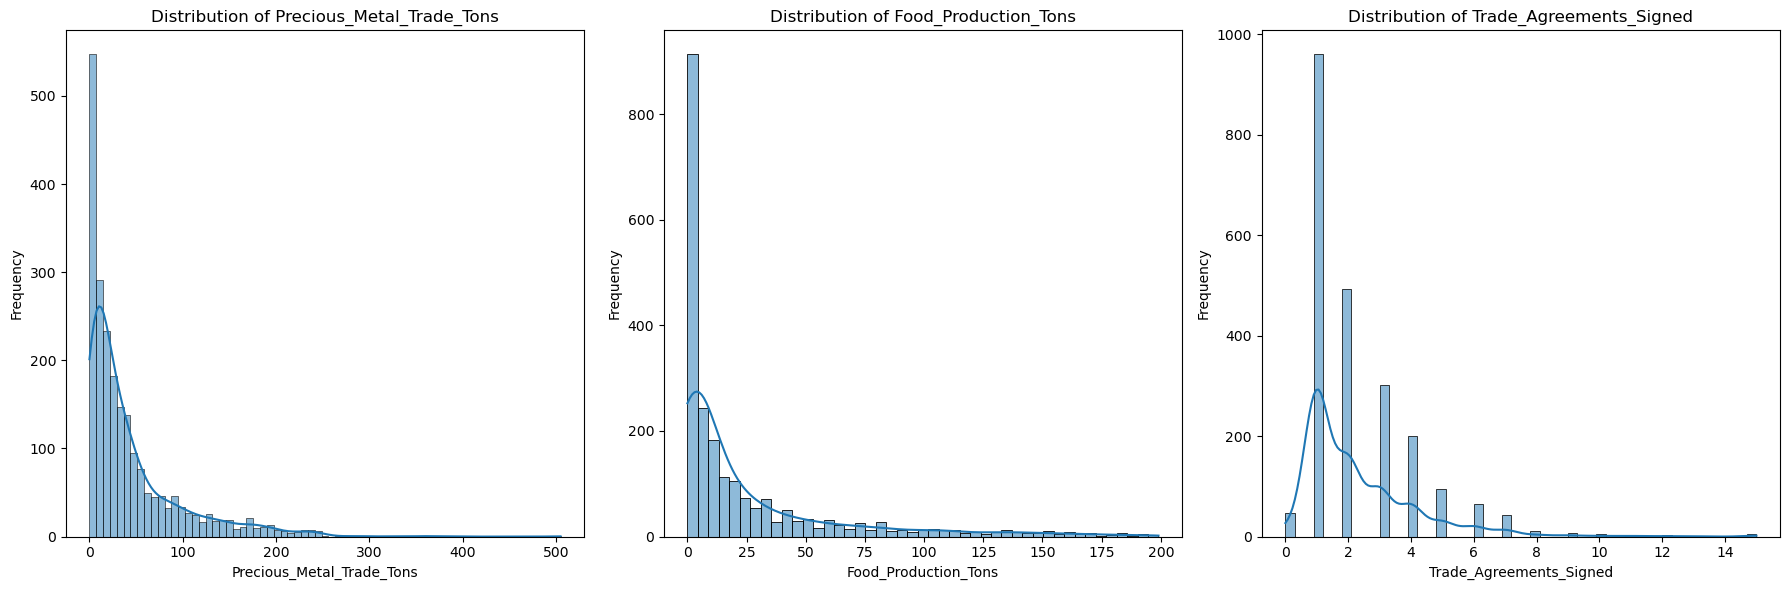

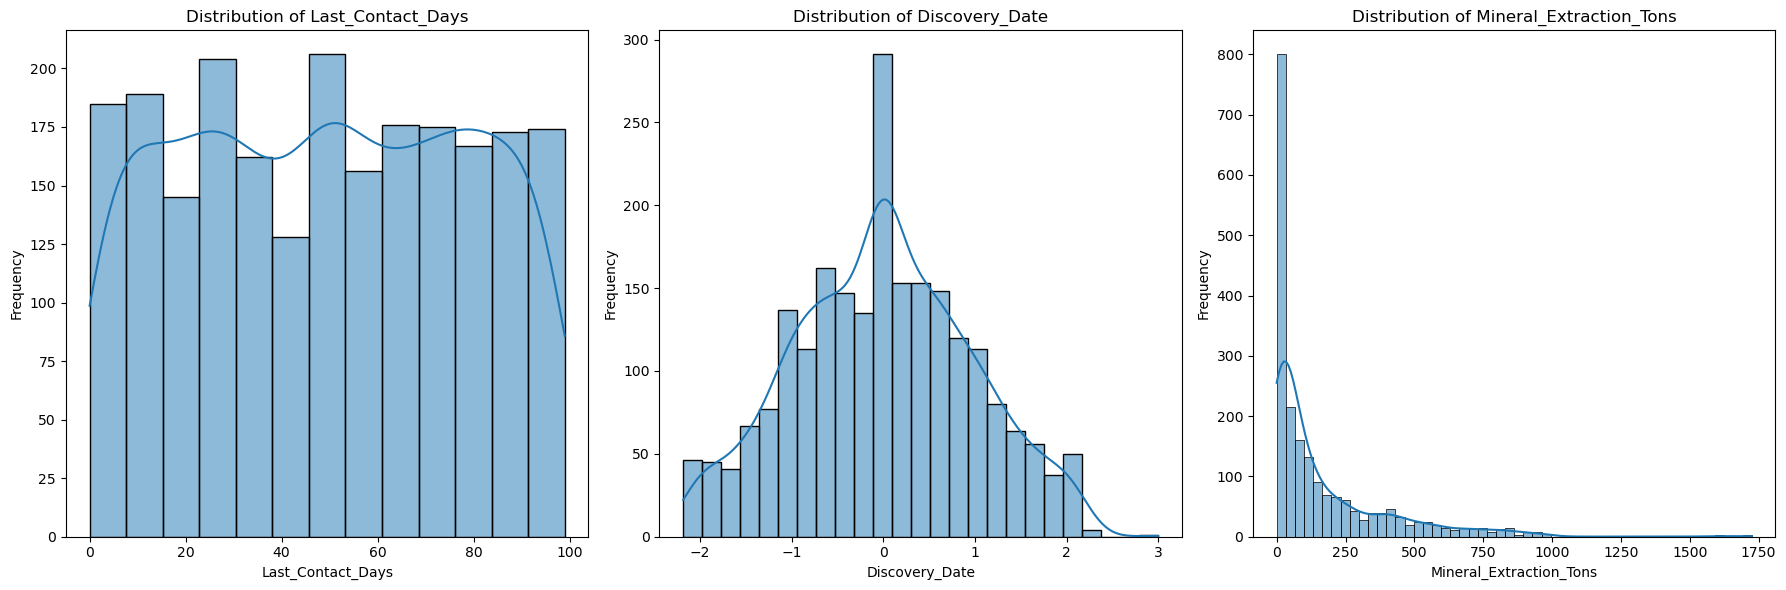

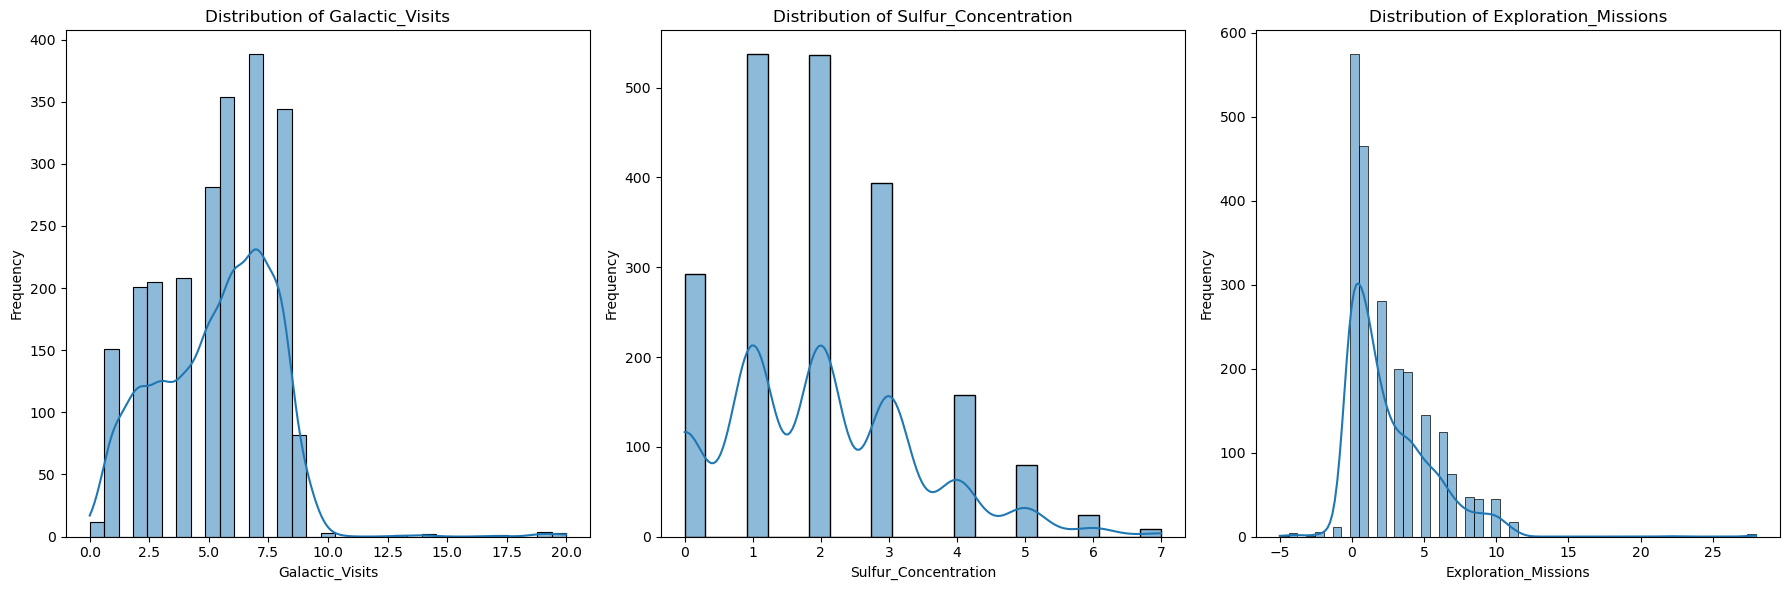

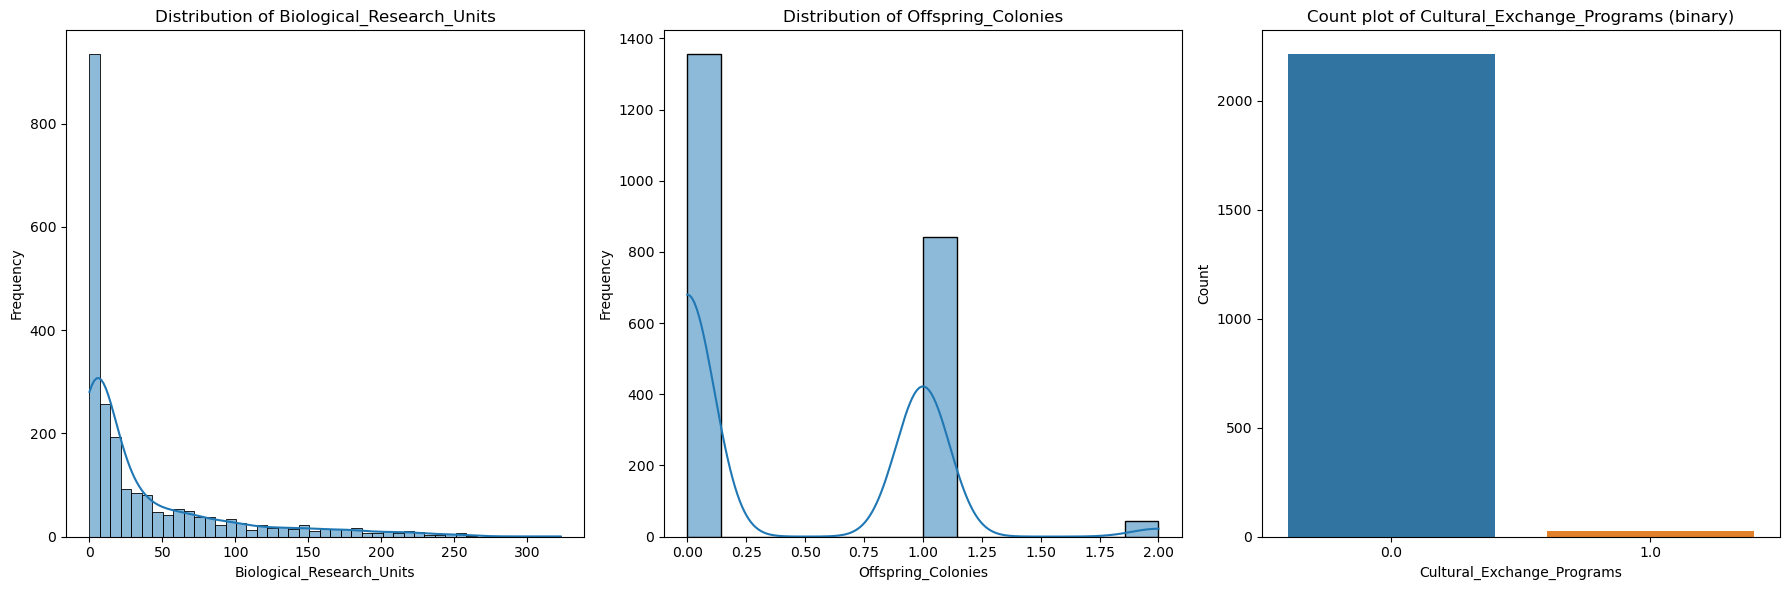

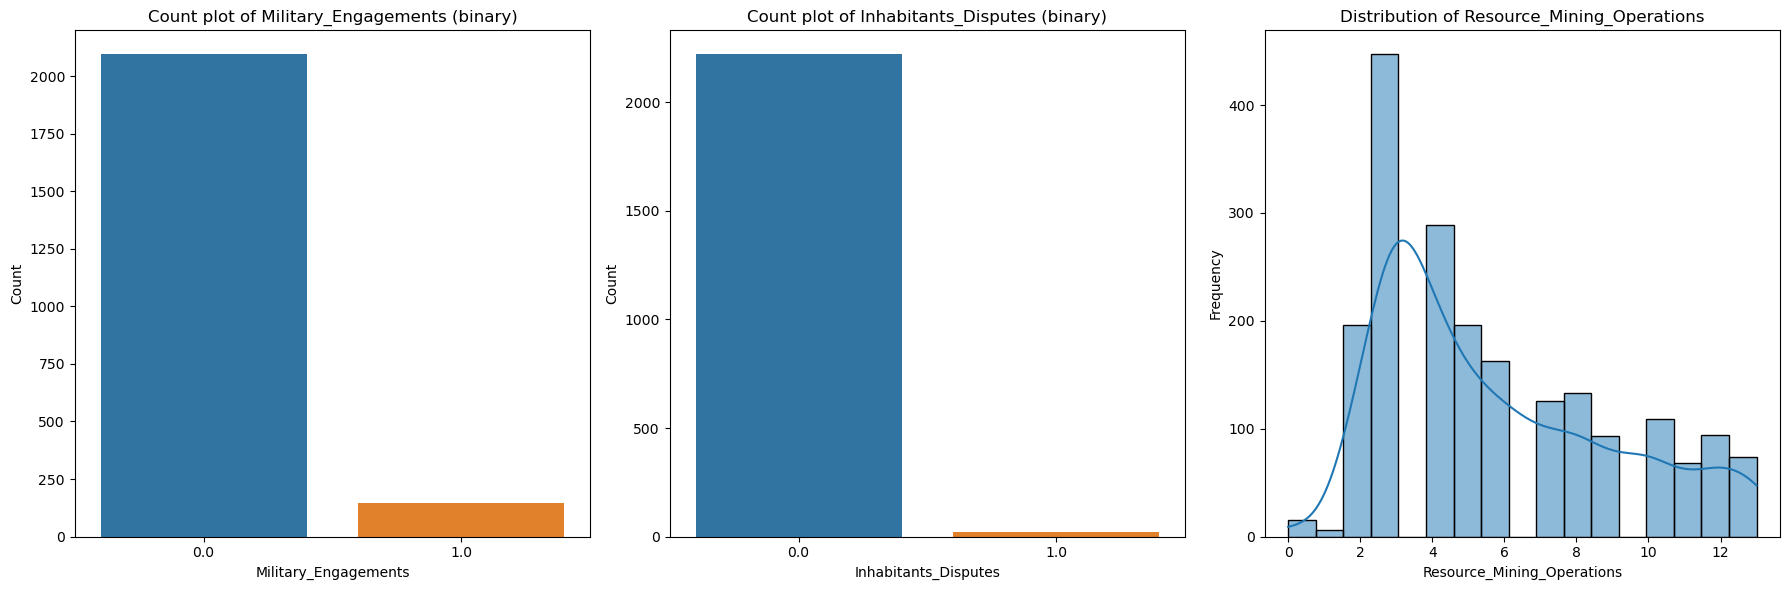

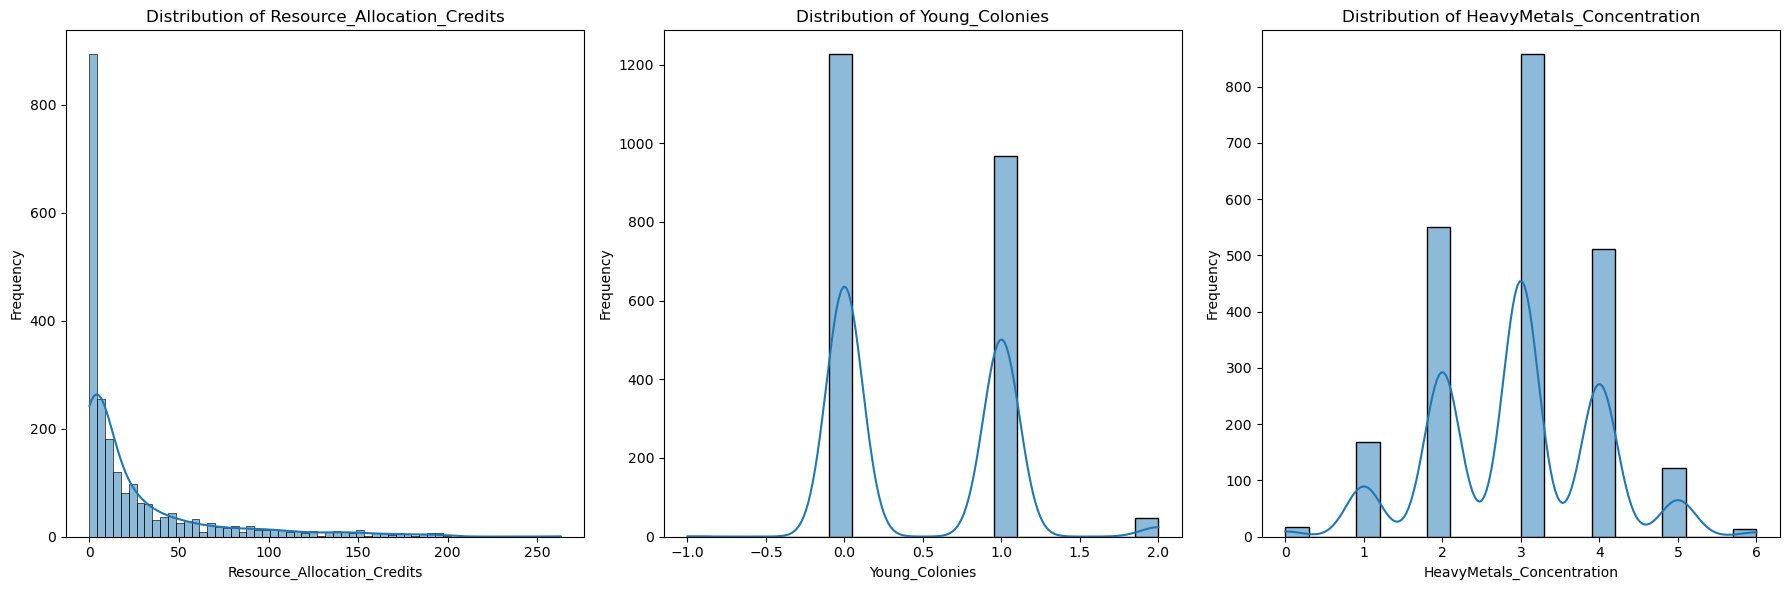

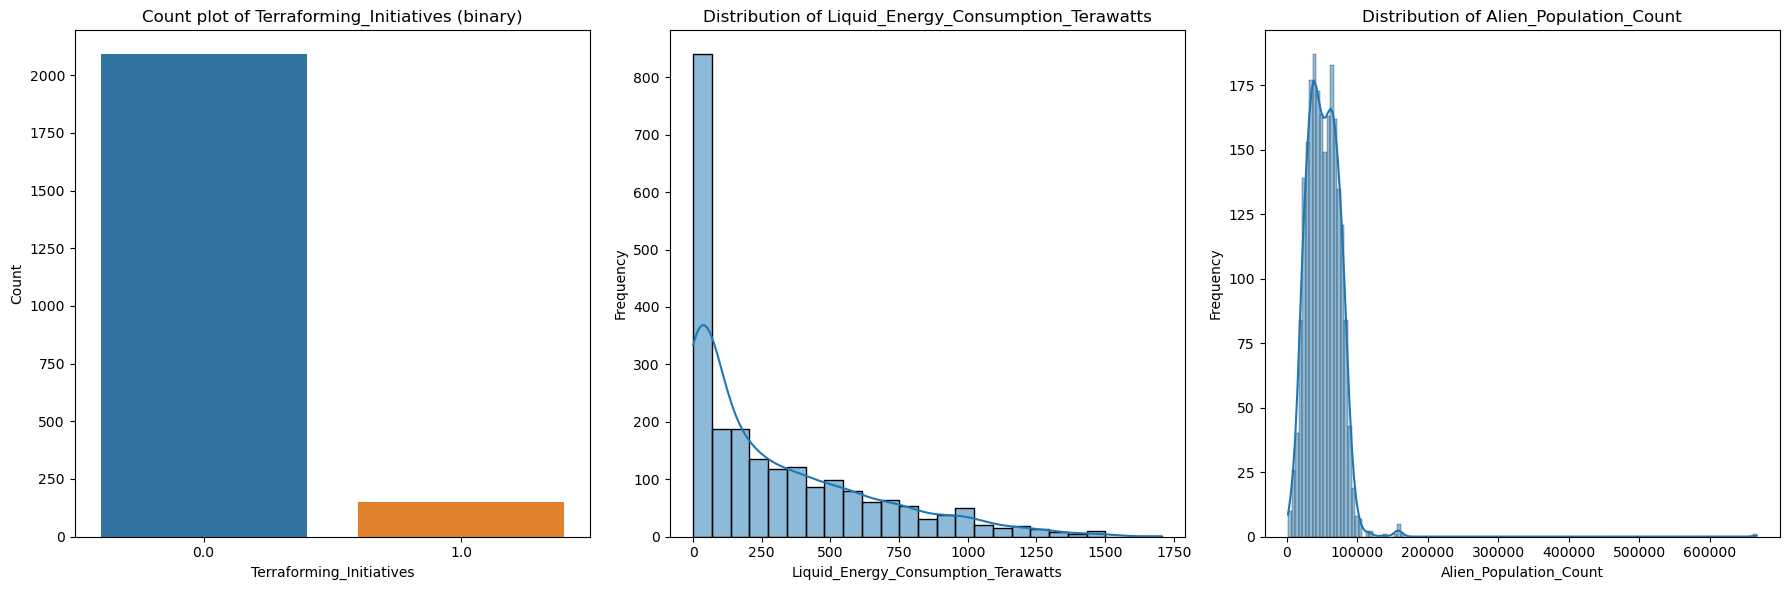

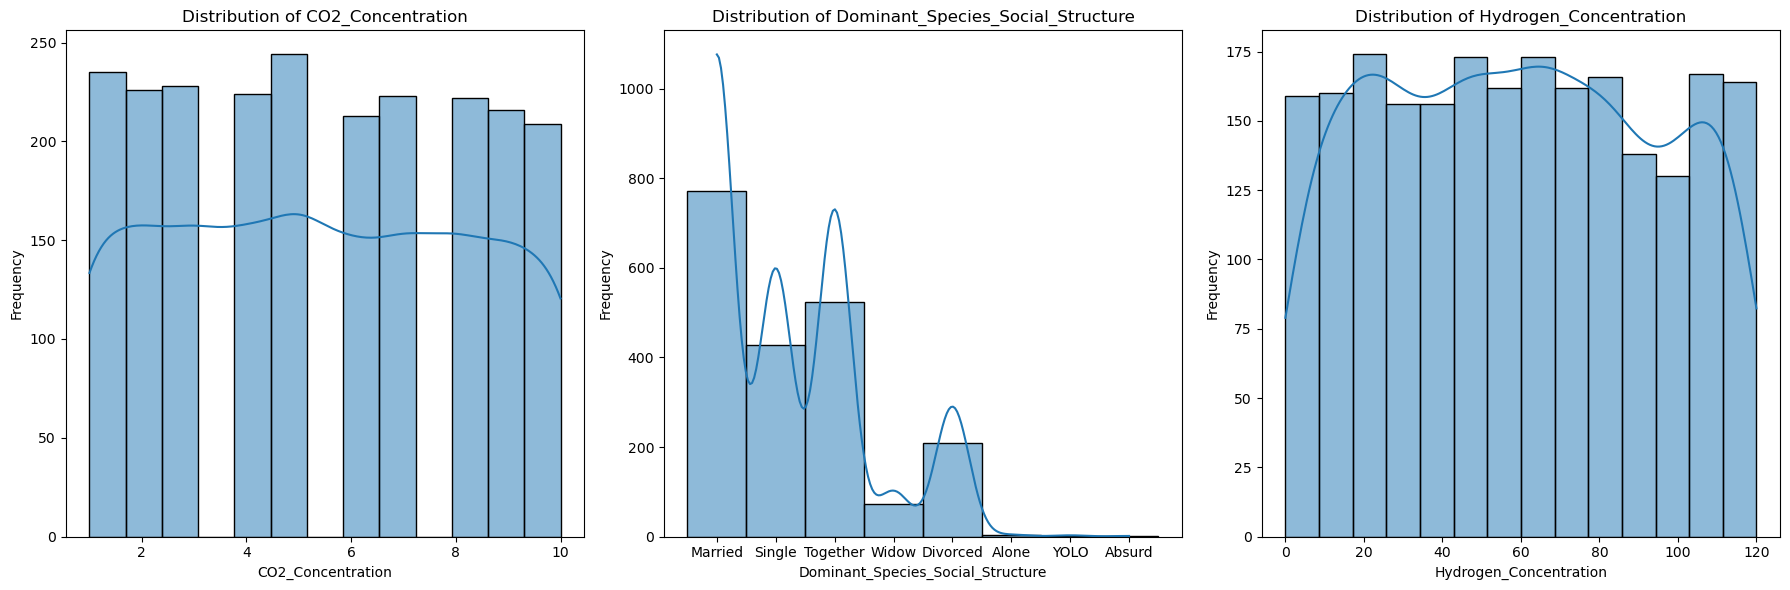

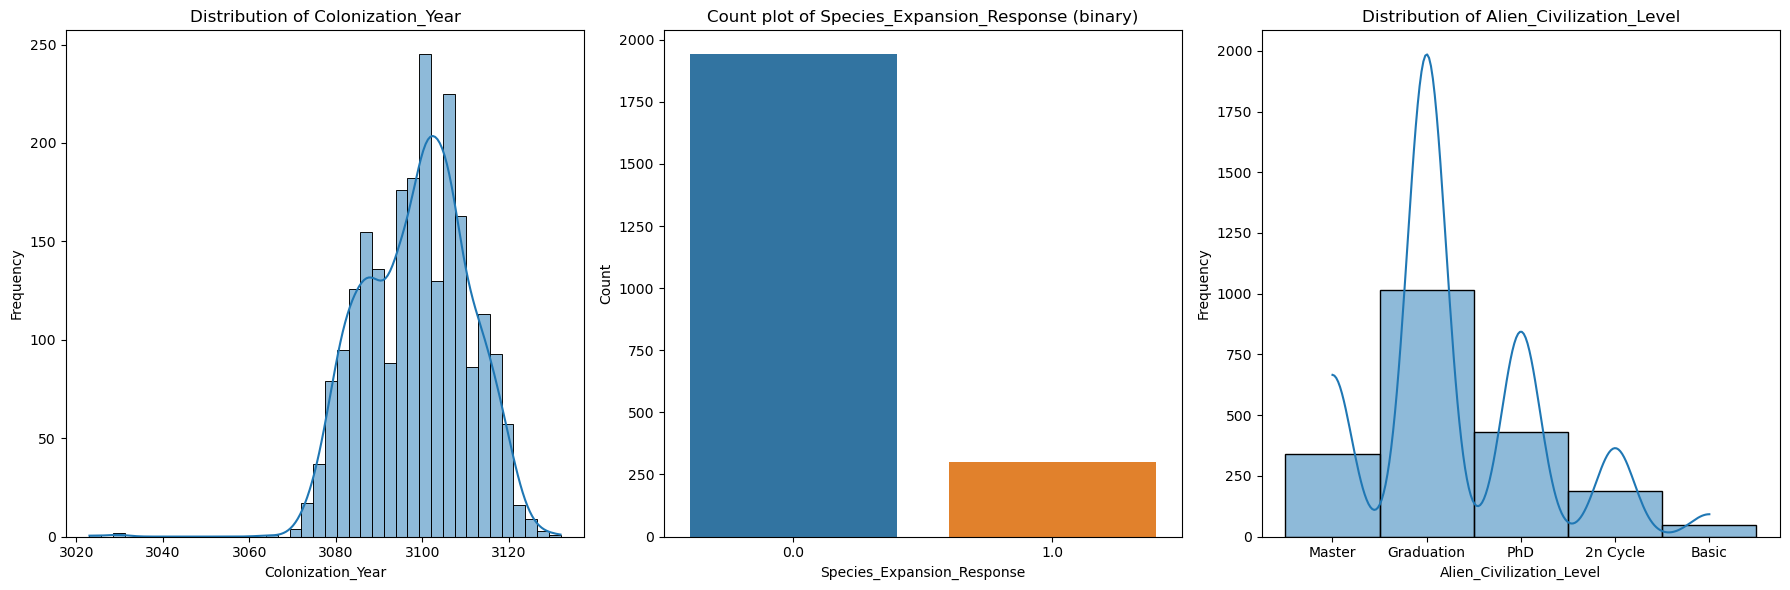

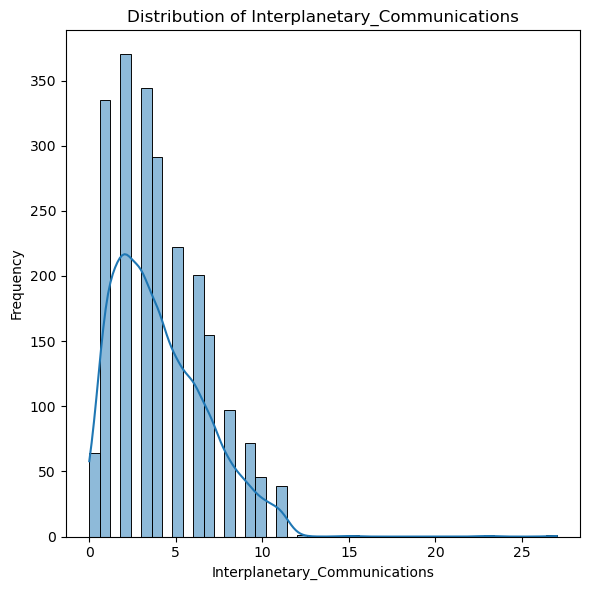

In [301]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 3
columns = df_in_progress.columns
perform_graphical_analysis(plots_per_row, columns)

In [302]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_in_progress)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df

/var/folders/yv/cljqrj8s42j40lvx9b9s7b_c0000gn/T/ipykernel_21044/1124174870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Variable 1,Variable 2,Correlation,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468,Mineral_Extraction_Tons,Exploration_Missions,0.678094
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.581901
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159,Food_Production_Tons,Biological_Research_Units,0.521746
3,Food_Production_Tons,Biological_Research_Units,0.599803,Mineral_Extraction_Tons,Biological_Research_Units,0.511288
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609,Mineral_Extraction_Tons,Liquid_Energy_Consumption_Terawatts,0.510653
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.508434
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399,NaN,NaN,NaN
7,Exploration_Missions,Alien_Population_Count,0.564253,NaN,NaN,NaN
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423,NaN,NaN,NaN
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047,NaN,NaN,NaN


We see that the correlations dropped (significantly), we could have avoided this by using KNN to complete our variables.